In [14]:
import numpy as np
# import h5py
import matplotlib.pyplot as plt
from testCases_v4a import *
# from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3 - Initialization
 The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

### 3.1 - 2-layer Neural Network

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Using random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Using zero initialization for the biases. Use `np.zeros(shape)`.

In [15]:
def init_params(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return params

In [16]:
parameters = init_params(3,2,1)

print(parameters)

{'W1': array([[ 0.01624345, -0.00611756, -0.00528172],
       [-0.01072969,  0.00865408, -0.02301539]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 0.01744812, -0.00761207]]), 'b2': array([[0.]])}


### 3.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, we should make sure that your dimensions match between each layer. Recalling that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

|              | **Shape of $W$**            | **Shape of $b$**          | **Activation**                       | **Shape of Activation** |
|--------------|-----------------------------|---------------------------|--------------------------------------|-------------------------|
| **Layer 1**  | $(n^{[1]}, 12288)$          | $(n^{[1]}, 1)$            | $Z^{[1]} = W^{[1]} X + b^{[1]}$      | $(n^{[1]}, 209)$        |
| **Layer 2**  | $(n^{[2]}, n^{[1]})$        | $(n^{[2]}, 1)$            | $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$| $(n^{[2]}, 209)$        |
| **⋮**        | ⋮                           | ⋮                         | ⋮                                    | ⋮                       |
| **Layer L-1**| $(n^{[L-1]}, n^{[L-2]})$    | $(n^{[L-1]}, 1)$          | $Z^{[L-1]} = W^{[L-1]} A^{[L-2]} + b^{[L-1]}$| $(n^{[L-1]}, 209)$ |
| **Layer L**  | $(n^{[L]}, n^{[L-1]})$      | $(n^{[L]}, 1)$            | $Z^{[L]} = W^{[L]} A^{[L-1]} + b^{[L]}$| $(n^{[L]}, 209)$      |


Remembering that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

In [17]:
def init_params_deep(layer_dims):
    
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
        bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    l = len(layer_dims)
    
    for i in range(1, l):
    # Since W1 should be shape(n_h[1], n_x), W2 should be shape(n_h[2], n_h[1]) .... so on upto Wn should be shape (n_h[n], n_y)
        parameters[f"W{i}"] = np.random.randn(layer_dims[i], layer_dims[i-1])
        parameters[f"b{i}"] = np.random.randn(layer_dims[i], 1)
        
    return parameters


In [18]:
parameters = init_params_deep([5,4,3,2])
print(parameters)

{'W1': array([[ 1.78862847,  0.43650985,  0.09649747, -1.8634927 , -0.2773882 ],
       [-0.35475898, -0.08274148, -0.62700068, -0.04381817, -0.47721803],
       [-1.31386475,  0.88462238,  0.88131804,  1.70957306,  0.05003364],
       [-0.40467741, -0.54535995, -1.54647732,  0.98236743, -1.10106763]]), 'b1': array([[-1.18504653],
       [-0.2056499 ],
       [ 1.48614836],
       [ 0.23671627]]), 'W2': array([[-1.02378514, -0.7129932 ,  0.62524497, -0.16051336],
       [-0.76883635, -0.23003072,  0.74505627,  1.97611078],
       [-1.24412333, -0.62641691, -0.80376609, -2.41908317]]), 'b2': array([[-0.92379202],
       [-1.02387576],
       [ 1.12397796]]), 'W3': array([[-0.13191423, -1.62328545,  0.64667545],
       [-0.35627076, -1.74314104, -0.59664964]]), 'b3': array([[-0.58859438],
       [-0.8738823 ]])}


## 4 - Forward propagation module

### 4.1 - Linear Forward 
We will start by implementing some basic functions that you will use later when implementing the model. We will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

In [19]:
def linear_forward(A,W,b):
    """
    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A) +b
    
    cache = (A,W,b)
    
    return Z, cache

In [20]:
A = np.random.randn(3,2)

W = np.random.randn(1,3)

b = np.zeros((1,1))

Z, cache = linear_forward(A,W,b)
print(f"Z: {Z}, Cache: {cache}")

Z: [[-1.31873037 -2.2488115 ]], Cache: (array([[ 0.02971382, -2.24825777],
       [-0.26776186,  1.01318344],
       [ 0.85279784,  1.1081875 ]]), array([[ 1.11939066,  1.48754313, -1.11830068]]), array([[0.]]))


In [21]:
def sigmoid(Z):
    """
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    cache = Z 
    return A, cache

### 4.2 - Linear-Activation Forward

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it we could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it we could just call:
``` python
A, activation_cache = relu(Z)

We are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, we will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.

In [22]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
        stored for computing the backward pass efficiently
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [23]:
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

A_sigmoid, linear_activation_cache = linear_activation_forward(A, W, b, activation="sigmoid")
A_relu, linear_activation_cache = linear_activation_forward(A, W, b, activation="relu")
print(f"A with Sigmoid: {A_sigmoid}")
print(f"A with Relu: {A_relu}")

A with Sigmoid: [[0.1426461  0.02232579]]
A with Relu: [[0. 0.]]


### 4.3 - L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, we will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.


In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

- Using a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, we can use `list.append(c)`.

In [24]:
def model_forward_deep(X, parameters):
    """
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
        every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    
    caches = []
    A = X
    l = len(parameters) // 2
    
    for i in range(1, l):
        A_prev = A
        
        A, cache = linear_activation_forward(A_prev, parameters[f'W{i}'], parameters[f'b{i}'], activation="relu")
        caches.append(cache)
        
    A_l, cache = linear_activation_forward(A, parameters[f'W{l}'], parameters[f'b{l}'], activation="sigmoid")
    caches.append(cache)
    
    return A_l, caches

In [25]:
X, parameters = L_model_forward_test_case_2hidden()
A_l, caches = model_forward_deep(X, parameters)
print(f"Activations: {A_l}")
print(f"Caches: {len(caches)}")

Activations: [[0.03921668 0.70498921 0.19734387 0.04728177]]
Caches: 3


## 5 - Cost function

Now we will implement forward and backward propagation. We need to compute the cost, because we want to check if your model is actually learning.

Computing the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [26]:
def compute_cost(A_l, Y):
    """
    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    
    cost = np.squeeze((-1/m) * (np.dot(Y, np.log(A_l).T) + np.dot((1-Y), np.log(1-A_l).T)))

    return cost

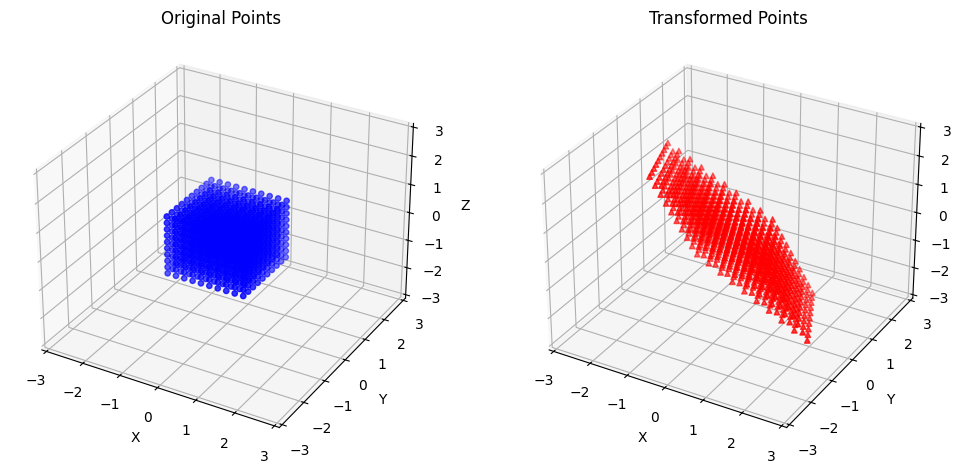

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
A = np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])

# Generate a set of points (for example, a grid of points in 3D)
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)
x, y, z = np.meshgrid(x, y, z)
points = np.vstack([x.ravel(), y.ravel(), z.ravel()])

# Apply the matrix transformation
transformed_points = A @ points

# Plotting
fig = plt.figure(figsize=(12, 6))

# Original points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(points[0], points[1], points[2], c='blue', marker='o', s=15)
ax1.set_title('Original Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])

# Transformed points
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(transformed_points[0], transformed_points[1], transformed_points[2], c='red', marker='^', s=15)
ax2.set_title('Transformed Points')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])

plt.show()
